In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df  = pd.read_csv("student_info.csv")

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

## Discover and visualize data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


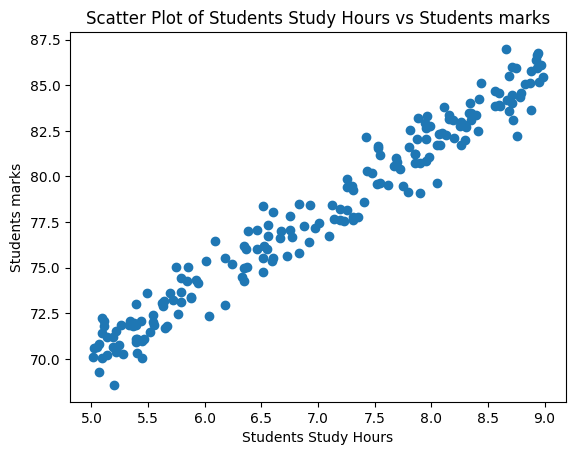

In [8]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

## Prepare the data for ML algorithms

In [9]:
#Data Cleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
df2 = df.fillna(df.mean())

In [12]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [13]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [14]:
x = df2[["study_hours"]]
y = df2["student_marks"]
print("shape of x = ", x.shape)
print("shape of y = ", y.shape)

shape of x =  (200, 1)
shape of y =  (200,)


In [15]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest,ytrain,ytest = tts(x,y, test_size = 0.3, random_state=42)

# Select a model and train it

In [16]:
#y = mx + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
lr.coef_

array([3.91448565])

In [19]:
lr.intercept_

50.55354115232809

In [20]:
ypred  = lr.predict(xtest)

In [21]:
df3 = pd.DataFrame(np.c_[xtest, ytest, ypred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])
df3.head()

,study_hours,student_marks_original,student_marks_predicted
0,6.09,76.48,74.392759
1,6.55,76.03,76.193422
2,8.13,82.27,82.378309
3,7.53,81.57,80.029618
4,6.38,77.01,75.527960


## Fine-tune your model

In [22]:
lr.score(xtest,ytest)

0.9455019470414955

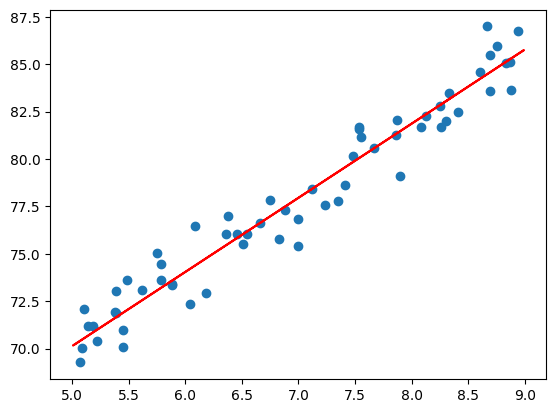

In [23]:
plt.scatter(xtest, ytest)
plt.plot(xtrain, lr.predict(xtrain), color = "r")

## Save ML Model

In [24]:
import joblib as jb
jb.dump(lr, "mark_predictor.pkl")

['mark_predictor.pkl']

In [25]:
model = jb.load("mark_predictor.pkl")

In [28]:
model.predict([[2]])

array([58.38251244])